# Stock Data Analysis of Tesla and GameStop

## Question 1: Use yfinance to Extract Stock Data

In this section, we will use the yfinance library to extract stock data for Tesla, reset the index, and display the first five rows of the dataframe.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset the index
tesla_data = tesla_data.reset_index()

# Display the first 5 rows
print("First 5 rows of Tesla stock data:")
tesla_data.head()

First 5 rows of Tesla stock data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

In this section, we will use webscraping with BeautifulSoup to extract Tesla's revenue data and display the last five rows.

In [5]:
# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send a GET request to the website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables in the webpage
tables = soup.find_all("table")

# Create a list to store the revenue data
data = []

# Loop through all the tables to find the one with revenue data
for table in tables:
    # Look for any table that might contain revenue data
    table_text = table.get_text().lower()
    if "tesla" in table_text and "revenue" in table_text:
        # Process the rows in this table
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) >= 2:  # Ensure the row has at least date and revenue columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                
                # Only add valid data
                if date and revenue:
                    try:
                        # Try to convert revenue to a number to validate it
                        float(revenue)
                        data.append({"Date": date, "Revenue": revenue})
                    except:
                        # Skip invalid revenue values
                        pass

# Create the DataFrame
tesla_revenue = pd.DataFrame(data)

# Convert Revenue to numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")

# Display the last 5 rows
print("Last 5 rows of Tesla revenue data:")
tesla_revenue.tail()

Last 5 rows of Tesla revenue data:


,Date,Revenue
73,2010-09-30,31
74,2010-06-30,28
75,2010-03-31,21
76,2009-09-30,46
77,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data for GameStop

In this section, we will use the yfinance library to extract stock data for GameStop, reset the index, and display the first five rows of the dataframe.

In [6]:
# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data = gme_data.reset_index()

# Display the first 5 rows
print("First 5 rows of GameStop stock data:")
gme_data.head()

First 5 rows of GameStop stock data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603295,1.662209,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

In this section, we will use webscraping with BeautifulSoup to extract GameStop's revenue data and display the last five rows.

In [8]:
# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
html_data = requests.get(url, headers=headers).text

# Parse the HTML content
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables in the webpage
tables = soup.find_all("table")

# Create a list to store the revenue data
data = []

# Loop through all the tables to find the one with revenue data
for table in tables:
    # Look for any table that might contain GameStop revenue data
    table_text = table.get_text().lower()
    if "gamestop" in table_text and "revenue" in table_text:
        # Process the rows in this table
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) >= 2:  # Ensure the row has at least date and revenue columns
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                
                # Only add valid data
                if date and revenue:
                    try:
                        # Try to convert revenue to a number to validate it
                        float(revenue)
                        data.append({"Date": date, "Revenue": revenue})
                    except:
                        # Skip invalid revenue values
                        pass


# Create the DataFrame
gme_revenue = pd.DataFrame(data)

# Convert Revenue to numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")

# Display the last 5 rows
print("Last 5 rows of GameStop revenue data:")
gme_revenue.tail()

Last 5 rows of GameStop revenue data:


,Date,Revenue
77,2010-01-31,3524
78,2009-10-31,1835
79,2009-07-31,1739
80,2009-04-30,1981
81,2009-01-31,3492


## Question 5: Plot Tesla Stock Graph

In this section, we will create a function to plot stock data and revenue data, then use it to graph Tesla's stock data with a title.

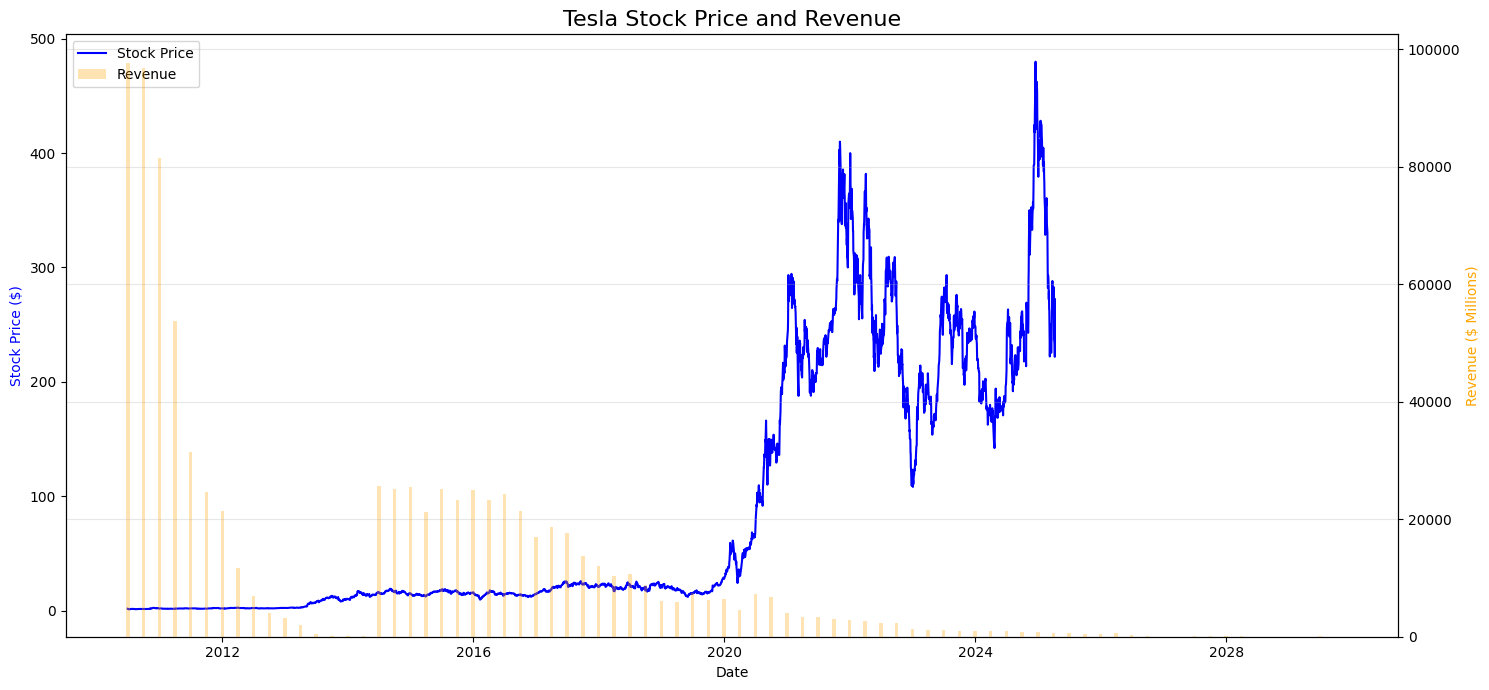

In [16]:
def make_graph(stock_data, revenue_data, stock_name):
    """
    Function to create stock price and revenue graphs
    
    Parameters:
    stock_data (DataFrame): Stock price data
    revenue_data (DataFrame): Revenue data
    stock_name (str): Name of the stock for the title
    """
    # Create a figure
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Convert stock dates to datetime
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])
    
    # For revenue data, create quarterly dates to avoid parsing issues
    revenue_data['Date'] = pd.date_range(
        start=stock_data['Date'].min(),
        periods=len(revenue_data),
        freq='Q'
    )
    
    # Sort the data
    stock_data = stock_data.sort_values('Date')
    revenue_data = revenue_data.sort_values('Date')
    
    # Plot the stock price
    ax.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Stock Price')
    
    # Create a twin y-axis for revenue
    ax2 = ax.twinx()
    
    # Plot the revenue data
    ax2.bar(revenue_data['Date'], revenue_data['Revenue'], width=20, color='orange', alpha=0.3, label='Revenue')
    
    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price ($)', color='blue')
    ax2.set_ylabel('Revenue ($ Millions)', color='orange')
    ax.set_title(f'{stock_name} Stock Price and Revenue', fontsize=16)
    
    # Format the x-axis for dates
    plt.xticks(rotation=45)
    
    # Create a combined legend
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
    
    # Adjust layout and display
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

# Make the Tesla stock graph
make_graph(tesla_data, tesla_revenue, "Tesla")

## Question 6: Plot GameStop Stock Graph

In this section, we will use the make_graph function we defined to graph GameStop's stock data with a title.

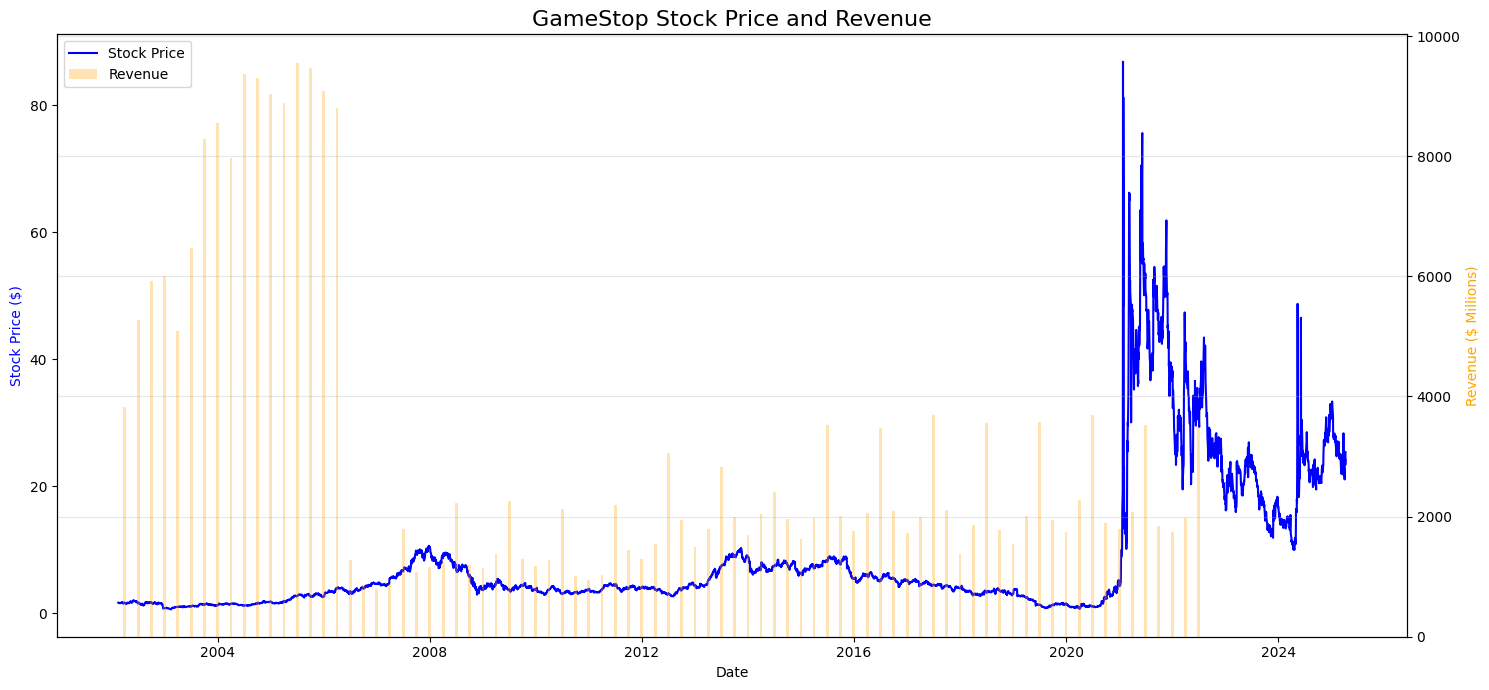

In [17]:
# For stock data, convert dates normally
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Make the GameStop stock graph
make_graph(gme_data, gme_revenue, "GameStop")